In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib



In [4]:
# Path ke dataset
dataset_path = '../data/dataset_utama.csv'

# Muat dataset
dataset = pd.read_csv(dataset_path, sep='\t')

# Tampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", dataset.shape)

# Tampilkan nama kolom
print("Nama kolom:", dataset.columns.tolist())

# Tampilkan beberapa baris pertama untuk verifikasi
print("\nContoh data:")
print(dataset.head())


Jumlah baris dan kolom: (1015341, 110)
Nama kolom: ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'dateload', 'screenw', 'screenh', 'int

In [6]:
# Cek missing values
print("\nJumlah missing values per kolom:")
print(dataset.isnull().sum())

# Identifikasi kolom numerik dan kategorikal
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns

# Isi missing values numerik dengan mean
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

# Isi missing values kategorikal dengan modus
for col in categorical_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

# Verifikasi setelah penanganan missing values
print("\nVerifikasi missing values setelah penanganan:")
print(dataset.isnull().sum().sum())



Jumlah missing values per kolom:
EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

Verifikasi missing values setelah penanganan:
0


In [8]:
# Pilih fitur utama (EXT, AGR, CSN, EST, OPN) tanpa kolom yang diakhiri dengan '_E'
feature_cols = [col for col in dataset.columns if col.startswith(('EXT', 'AGR', 'CSN', 'EST', 'OPN')) and not col.endswith('_E')]

# Verifikasi fitur yang dipilih
print("\nFitur yang dipilih untuk model:")
print(feature_cols)

# Seleksi fitur
X = dataset[feature_cols]

# Siapkan target (skor rata-rata per dimensi)
y = pd.DataFrame()
dimensions = ['EXT', 'AGR', 'CSN', 'EST', 'OPN']
for dim in dimensions:
    cols = [col for col in dataset.columns if col.startswith(dim) and not col.endswith('_E')]
    y[dim] = dataset[cols].mean(axis=1)

# Verifikasi target
print("\nContoh target (y):")
print(y.head())



Fitur yang dipilih untuk model:
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

Contoh target (y):
   EXT  AGR  CSN  EST  OPN
0  3.0  3.1  3.2  2.4  3.3
1  3.4  3.2  3.1  2.1  2.7
2  2.9  2.8  2.8  2.6  3.1
3  2.6  3.2  2.7  2.7  3.1
4  3.5  3.0  3.2  2.3  3.6


In [10]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform fitur
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame untuk kemudahan
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

# Simpan scaler untuk inference
joblib.dump(scaler, '../models/scaler.pkl')
print("\nScaler telah disimpan di '../models/scaler.pkl'")



Scaler telah disimpan di '../models/scaler.pkl'


In [12]:
# Bagi data menjadi training (70%) dan temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Bagi temp menjadi validation (15%) dan testing (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("\nBentuk data training:", X_train.shape)
print("Bentuk data validation:", X_val.shape)
print("Bentuk data testing:", X_test.shape)



Bentuk data training: (710738, 50)
Bentuk data validation: (152301, 50)
Bentuk data testing: (152302, 50)


In [14]:
# Simpan dataset yang sudah dipreproses
X_train.to_csv('../data/X_train.csv', index=False)
X_val.to_csv('../data/X_val.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_val.to_csv('../data/y_val.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

print("\nDataset yang sudah dipreproses telah disimpan di folder 'data/'")



Dataset yang sudah dipreproses telah disimpan di folder 'data/'


In [ ]:
#MEMBANGUNG MODEL DAN MELATIH MODEL

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [18]:
# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layers
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layers per dimensi
output_layers = []
for dim in dimensions:
    output = Dense(1, name=dim)(x)  # Linear activation untuk regresi
    output_layers.append(output)

# Buat model
model = Model(inputs=input_layer, outputs=output_layers)

# Tampilkan ringkasan model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          6528        ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dropout[0][0]']                
                                                                                              

In [20]:
# Compile Model
losses = {dim: 'mse' for dim in dimensions}  # Mean Squared Error untuk regresi
metrics = {dim: ['mae'] for dim in dimensions}  # Mean Absolute Error

model.compile(optimizer='adam', loss=losses, metrics=metrics)

print("\nModel telah dikompilasi dengan loss='mse' dan metrics='mae'")



Model telah dikompilasi dengan loss='mse' dan metrics='mae'


In [22]:
# EarlyStopping untuk menghentikan pelatihan jika tidak ada peningkatan
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# ModelCheckpoint untuk menyimpan model terbaik
checkpoint = ModelCheckpoint(
    '../models/multi_output_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

print("\nCallbacks telah ditentukan: EarlyStopping dan ModelCheckpoint")



Callbacks telah ditentukan: EarlyStopping dan ModelCheckpoint


In [24]:
# Latih Model
history = model.fit(
    X_train, [y_train[dim] for dim in dimensions],
    validation_data=(X_val, [y_val[dim] for dim in dimensions]),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)

print("\nPelatihan model selesai.")


Epoch 1/50
22211/22211 [==============================] - ETA: 0s - loss: 0.4187 - EXT_loss: 0.0765 - AGR_loss: 0.0802 - CSN_loss: 0.0801 - EST_loss: 0.0983 - OPN_loss: 0.0836 - EXT_mae: 0.1668 - AGR_mae: 0.1713 - CSN_mae: 0.1730 - EST_mae: 0.2006 - OPN_mae: 0.1765
Epoch 1: val_loss improved from inf to 0.01742, saving model to ../models\multi_output_model.h5
22211/22211 [==============================] - 181s 8ms/step - loss: 0.4187 - EXT_loss: 0.0765 - AGR_loss: 0.0802 - CSN_loss: 0.0801 - EST_loss: 0.0983 - OPN_loss: 0.0836 - EXT_mae: 0.1668 - AGR_mae: 0.1713 - CSN_mae: 0.1730 - EST_mae: 0.2006 - OPN_mae: 0.1765 - val_loss: 0.0174 - val_EXT_loss: 0.0035 - val_AGR_loss: 0.0030 - val_CSN_loss: 0.0027 - val_EST_loss: 0.0035 - val_OPN_loss: 0.0047 - val_EXT_mae: 0.0442 - val_AGR_mae: 0.0419 - val_CSN_mae: 0.0373 - val_EST_mae: 0.0450 - val_OPN_mae: 0.0515
Epoch 2/50
22204/22211 [============================>.] - ETA: 0s - loss: 0.0993 - EXT_loss: 0.0166 - AGR_loss: 0.0172 - CSN_loss: 0.

In [26]:
# Evaluasi Model pada Data Testing
test_metrics = model.evaluate(
    X_test, 
    [y_test[dim] for dim in dimensions],
    verbose=1
)

# Organisasi metrik evaluasi
metrics_names = model.metrics_names
metrics_dict = dict(zip(metrics_names, test_metrics))

# Tampilkan metrik per output
for dim in dimensions:
    mse = metrics_dict[f'{dim}_loss']
    mae = metrics_dict[f'{dim}_mae']
    print(f"\nEvaluasi untuk {dim}:")
    print(f"Loss (MSE): {mse}")
    print(f"MAE: {mae}")


4760/4760 [==============================] - 21s 4ms/step - loss: 0.0130 - EXT_loss: 0.0033 - AGR_loss: 0.0024 - CSN_loss: 0.0019 - EST_loss: 0.0027 - OPN_loss: 0.0028 - EXT_mae: 0.0425 - AGR_mae: 0.0356 - CSN_mae: 0.0328 - EST_mae: 0.0400 - OPN_mae: 0.0403

Evaluasi untuk EXT:
Loss (MSE): 0.003279382362961769
MAE: 0.04245178773999214

Evaluasi untuk AGR:
Loss (MSE): 0.0023893641773611307
MAE: 0.035639259964227676

Evaluasi untuk CSN:
Loss (MSE): 0.0018925279146060348
MAE: 0.032832253724336624

Evaluasi untuk EST:
Loss (MSE): 0.002680371282622218
MAE: 0.03996880352497101

Evaluasi untuk OPN:
Loss (MSE): 0.0027715747710317373
MAE: 0.04032784327864647


4760/4760 [==============================] - 6s 1ms/step


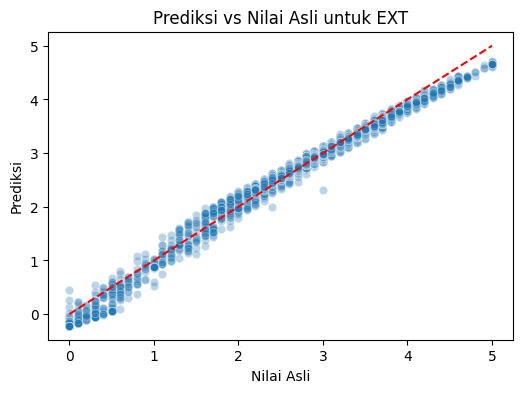

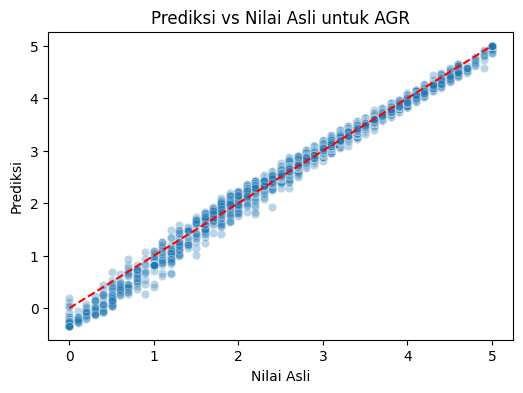

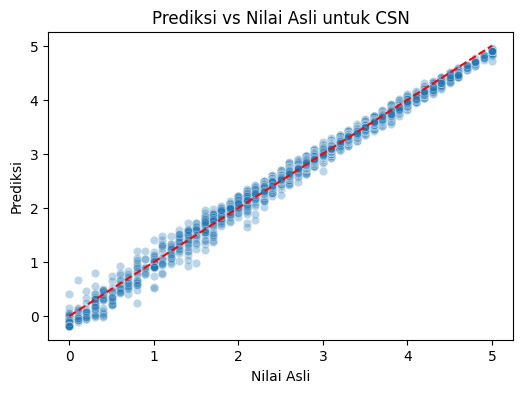

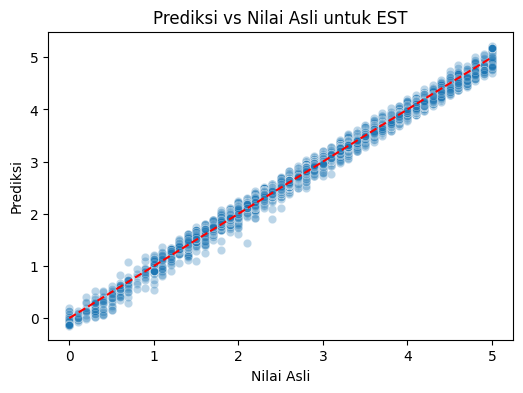

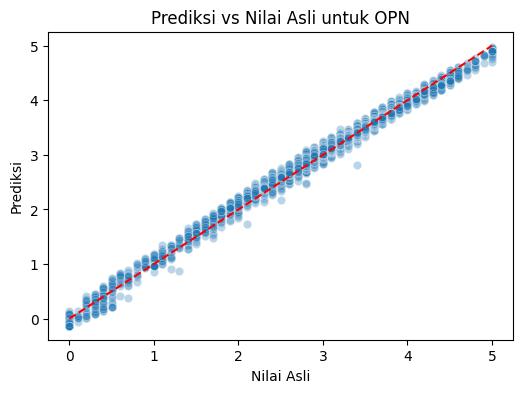

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi pada data testing
predictions = model.predict(X_test)

# Buat DataFrame untuk prediksi dan nilai sebenarnya
pred_df = pd.DataFrame({
    dim: predictions[i].flatten() for i, dim in enumerate(dimensions)
})

true_df = y_test.reset_index(drop=True)

# Plot per dimensi
for dim in dimensions:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=true_df[dim], y=pred_df[dim], alpha=0.3)
    plt.title(f'Prediksi vs Nilai Asli untuk {dim}')
    plt.xlabel('Nilai Asli')
    plt.ylabel('Prediksi')
    plt.plot([true_df[dim].min(), true_df[dim].max()], 
             [true_df[dim].min(), true_df[dim].max()], 'r--')
    plt.show()


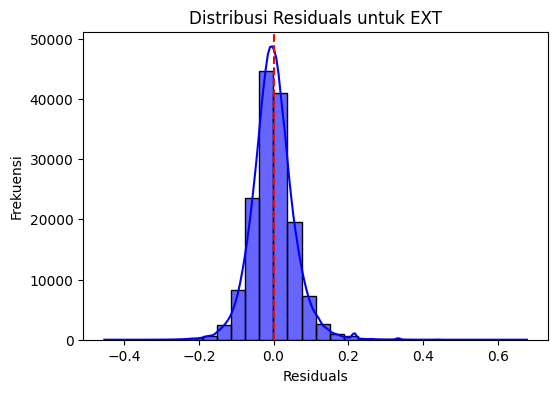

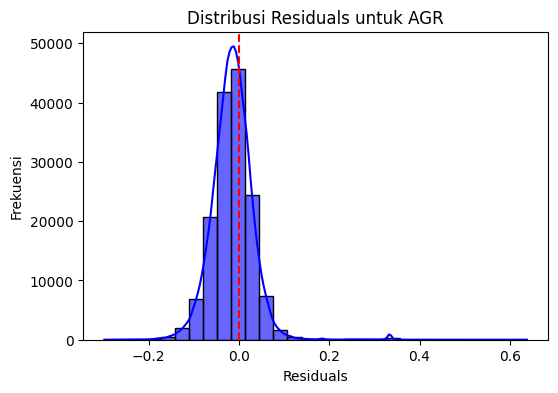

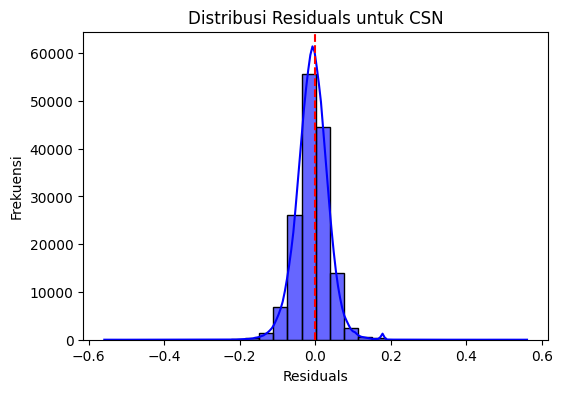

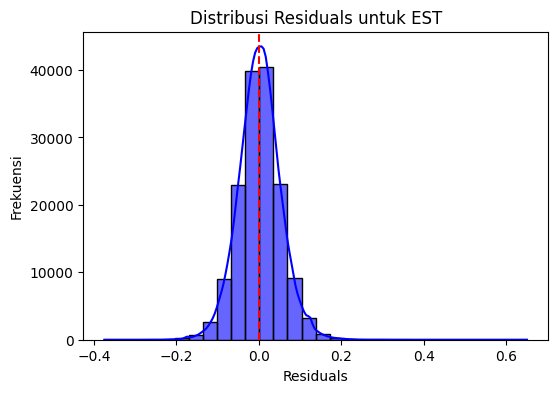

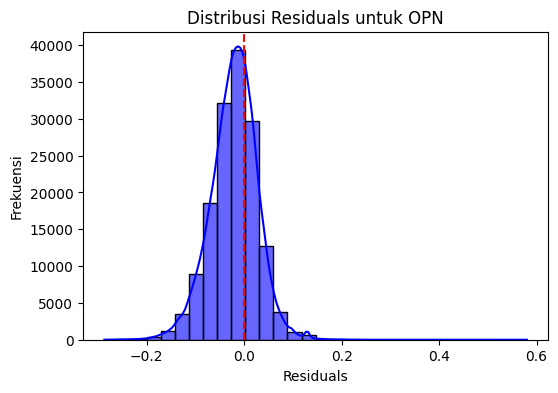

In [32]:
for dim in dimensions:
    residuals = true_df[dim] - pred_df[dim]
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f'Distribusi Residuals untuk {dim}')
    plt.xlabel('Residuals')
    plt.ylabel('Frekuensi')
    plt.axvline(0, color='red', linestyle='--')
    plt.show()


In [ ]:
#TESTING

In [34]:
# Data baru (50 fitur: 10 fitur per dimensi)
new_samples = [
    [4, 2, 5, 3, 4, 1, 4, 3, 5, 2,  # EXT
     3, 4, 3, 2, 4, 5, 3, 4, 2, 5,  # AGR
     4, 3, 5, 2, 3, 1, 4, 5, 2, 3,  # CSN
     3, 2, 4, 3, 5, 4, 2, 5, 3, 4,  # EST
     5, 3, 4, 2, 3, 4, 5, 2, 4, 3], # OPN
    [3, 3, 4, 2, 5, 3, 4, 5, 2, 4,  # EXT
     5, 3, 4, 2, 3, 4, 5, 2, 4, 3,  # AGR
     4, 3, 5, 2, 3, 1, 4, 5, 2, 3,  # CSN
     3, 2, 4, 3, 5, 4, 2, 5, 3, 4,  # EST
     5, 3, 4, 2, 3, 4, 5, 2, 4, 3], # OPN
]

# Tampilkan data baru untuk verifikasi
print("Data baru:")
for i, sample in enumerate(new_samples):
    print(f"Sample {i+1}: {sample}")


Data baru:
Sample 1: [4, 2, 5, 3, 4, 1, 4, 3, 5, 2, 3, 4, 3, 2, 4, 5, 3, 4, 2, 5, 4, 3, 5, 2, 3, 1, 4, 5, 2, 3, 3, 2, 4, 3, 5, 4, 2, 5, 3, 4, 5, 3, 4, 2, 3, 4, 5, 2, 4, 3]
Sample 2: [3, 3, 4, 2, 5, 3, 4, 5, 2, 4, 5, 3, 4, 2, 3, 4, 5, 2, 4, 3, 4, 3, 5, 2, 3, 1, 4, 5, 2, 3, 3, 2, 4, 3, 5, 4, 2, 5, 3, 4, 5, 3, 4, 2, 3, 4, 5, 2, 4, 3]


In [36]:
# Normalisasi data baru menggunakan scaler yang sama seperti saat pelatihan
new_samples_scaled = scaler.transform(new_samples)

# Tampilkan data yang sudah dinormalisasi
print("\nData baru setelah normalisasi:")
print(new_samples_scaled)



Data baru setelah normalisasi:
[[ 1.07016406e+00 -5.84462591e-01  1.40999851e+00 -1.13717242e-01
   5.66437100e-01 -1.14408787e+00  8.77886941e-01 -3.26423262e-01
   1.51410977e+00 -1.19353359e+00 -2.12708445e-01  6.80356480e-01
  -7.28251963e-01 -5.30199883e-01  9.08971264e-01  1.62882297e+00
  -3.90082932e-02  9.81110978e-01 -8.39900044e-01  1.68419829e+00
   1.30317638e+00 -7.29303298e-01  2.14703107e+00 -1.71075053e+00
   6.23104642e-01 -2.24592470e+00  1.61184345e+00  1.19737124e+00
  -1.53477683e+00 -5.48553793e-01 -2.53452676e-01 -6.69836037e-01
   2.36823288e-02  3.05532553e-01  1.86432275e+00  8.25597670e-01
  -1.50672095e+00  2.22350446e+00 -1.57394394e-01  3.89071564e-01
   1.16367032e+00  8.31277458e-01 -6.21024755e-05  9.96332046e-05
  -7.99691236e-01  1.90852223e+00  1.01588487e+00 -9.42741385e-01
  -1.18228724e-01 -9.27301238e-01]
 [ 2.78583652e-01  1.71521333e-01  5.86233526e-01 -9.22546796e-01
   1.34984754e+00  4.89040330e-01  8.77886941e-01  1.24739148e+00
  -7.1661

D:\AI BANGKIT\DISKRIMINATIF\peronality_assessment _seluruhnya\venv2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
# Lakukan prediksi pada data baru
predictions = model.predict(new_samples_scaled)

# Tampilkan hasil prediksi
print("\nHasil prediksi per dimensi kepribadian:")
for i, dim in enumerate(dimensions):
    print(f"{dim}: {predictions[i].flatten()}")


1/1 [==============================] - 0s 170ms/step

Hasil prediksi per dimensi kepribadian:
EXT: [3.2883155 3.438713 ]
AGR: [3.2358468 3.2668808]
CSN: [3.524454  3.5252435]
EST: [3.5543237 3.5693753]
OPN: [3.5223682 3.5020056]
